## Import Libraries

In [284]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [351]:
df = pd.read_csv("product_details.csv")

In [353]:
df.shape

(205, 40)

In [355]:
df.head(2)

,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,fingerprint,battery type,width,height/length,depth,weight,card reader,Shipping Weight (kg),Renewed Grade,Renewed Remarks
0,Huawei MateBook 14 Laptop,"4,299",24.0,12 Months,Manufacturer,638525.0,53014ASK,Intel Core Ultra 5 125H,Intel AI Boost,Yes,...,Yes,Lithium Polymer (Li-Po),312.60 mm ( 12.31 in ),226.80 mm ( 8.93 in ),15.90 mm ( .63 in ),1.31 kg ( 2.89 lb ),NaN,NaN,NaN,NaN
1,Apple MacBook Air 15 M3 Laptop,"5,999",24.0,12 Months,Manufacturer,646475.0,MC9D4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),NaN,NaN,NaN,NaN


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product Title                  205 non-null    object 
 1   Product Price                  205 non-null    object 
 2   Warranty Period (Months)       198 non-null    float64
 3   Accesorises warranty           198 non-null    object 
 4   Warranted by                   198 non-null    object 
 5   SKU                            198 non-null    float64
 6   Manufacturer Number            198 non-null    object 
 7   processor type                 198 non-null    object 
 8   NPU (Neural Processing Unit)   113 non-null    object 
 9   AI (Artificial Intelligence)   112 non-null    object 
 10  display type                   198 non-null    object 
 11  graphics card                  198 non-null    object 
 12  display size                   198 non-null    obj

In [360]:
df.shape

(205, 40)

- Uniqueness:

In [363]:
df.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool>

In [365]:
df.drop_duplicates(inplace = True)

In [367]:
df.shape

(200, 40)

- Completeness

In [370]:
# Filtering and displaying rows where 'Product Title' contains "Not available"
not_available_rows = df[df['Product Title'].str.contains("Not available", na=False)]

not_available_rows

,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,fingerprint,battery type,width,height/length,depth,weight,card reader,Shipping Weight (kg),Renewed Grade,Renewed Remarks
111,Not available,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Not available,689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
df['Product Title'].str.contains("Not available", na=False)

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: Product Title, Length: 200, dtype: bool

In [374]:
df.shape

(200, 40)

In [376]:
# Remove rows where 'Product Title' contains "Not available"
df = df[~df['Product Title'].str.contains("Not available", na=False)]

# Display the first few rows of the updated 'df' to confirm the change
df.head()

,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,fingerprint,battery type,width,height/length,depth,weight,card reader,Shipping Weight (kg),Renewed Grade,Renewed Remarks
0,Huawei MateBook 14 Laptop,"4,299",24.0,12 Months,Manufacturer,638525.0,53014ASK,Intel Core Ultra 5 125H,Intel AI Boost,Yes,...,Yes,Lithium Polymer (Li-Po),312.60 mm ( 12.31 in ),226.80 mm ( 8.93 in ),15.90 mm ( .63 in ),1.31 kg ( 2.89 lb ),NaN,NaN,NaN,NaN
1,Apple MacBook Air 15 M3 Laptop,"5,999",24.0,12 Months,Manufacturer,646475.0,MC9D4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),NaN,NaN,NaN,NaN
2,Apple MacBook Air 15 M3 Laptop,"5,999",24.0,12 Months,Manufacturer,632673.0,MRYR3ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),NaN,NaN,NaN,NaN
3,Asus Laptop,"3,799",24.0,12 Months,Manufacturer,642879.0,UM3406OLEDR7W,AMD Ryzen 7-8840HS,AMD XDNA up to 16 TOPS,Yes,...,Yes,Lithium Ion (Li-Ion) - 4 Cell,32.24 cm ( 12.69 in ),22.01 cm ( 8.67 in ),1.49 cm ( .59 in ),1.20 kg ( 2.65 lb ),Yes,NaN,NaN,NaN
4,Microsoft Surface Laptop 7 Laptop,"9,699",24.0,Not Applicable,JARIR,639206.0,ZHI00014,Snapdragon X Elite 12 Core,Qualcomm Hexagon NPU 45 TOPS,Yes,...,NaN,Lithium Ion (Li-Ion) - 6 Cell,32.90 cm ( 12.95 in ),23.90 cm ( 9.41 in ),1.80 cm ( .71 in ),1.60 kg ( 3.53 lb ),NaN,NaN,NaN,NaN


In [378]:
df.isnull().sum()

Product Title                      0
Product Price                      0
Warranty Period (Months)           0
Accesorises warranty               0
Warranted by                       0
SKU                                0
Manufacturer Number                0
processor type                     0
NPU (Neural Processing Unit)      85
AI (Artificial Intelligence)      86
display type                       0
graphics card                      0
display size                       0
operating system                   0
product type                       0
model/chipset number             115
model series                       0
generation/release                 0
color                              1
operating system architecture    100
processor speed                   94
capacity                           0
RAM                                0
connectivity technology            0
ports                              2
touch display                    176
display resolution                 0
c

In [380]:
# Replacing 'Not available' with NaN, then removing commas and converting to float
df['Product Price'] = pd.to_numeric(df['Product Price'].str.replace('٫', '').str.replace(',', ''), errors='coerce')

# Displaying the first few rows to confirm the change
df.head()


,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,fingerprint,battery type,width,height/length,depth,weight,card reader,Shipping Weight (kg),Renewed Grade,Renewed Remarks
0,Huawei MateBook 14 Laptop,4299,24.0,12 Months,Manufacturer,638525.0,53014ASK,Intel Core Ultra 5 125H,Intel AI Boost,Yes,...,Yes,Lithium Polymer (Li-Po),312.60 mm ( 12.31 in ),226.80 mm ( 8.93 in ),15.90 mm ( .63 in ),1.31 kg ( 2.89 lb ),NaN,NaN,NaN,NaN
1,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,646475.0,MC9D4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),NaN,NaN,NaN,NaN
2,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,632673.0,MRYR3ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),NaN,NaN,NaN,NaN
3,Asus Laptop,3799,24.0,12 Months,Manufacturer,642879.0,UM3406OLEDR7W,AMD Ryzen 7-8840HS,AMD XDNA up to 16 TOPS,Yes,...,Yes,Lithium Ion (Li-Ion) - 4 Cell,32.24 cm ( 12.69 in ),22.01 cm ( 8.67 in ),1.49 cm ( .59 in ),1.20 kg ( 2.65 lb ),Yes,NaN,NaN,NaN
4,Microsoft Surface Laptop 7 Laptop,9699,24.0,Not Applicable,JARIR,639206.0,ZHI00014,Snapdragon X Elite 12 Core,Qualcomm Hexagon NPU 45 TOPS,Yes,...,NaN,Lithium Ion (Li-Ion) - 6 Cell,32.90 cm ( 12.95 in ),23.90 cm ( 9.41 in ),1.80 cm ( .71 in ),1.60 kg ( 3.53 lb ),NaN,NaN,NaN,NaN


In [386]:
df['Product Price']

0      4299
1      5999
2      5999
3      3799
4      9699
       ... 
200    5199
201    5029
202    2799
203    2499
204    5799
Name: Product Price, Length: 198, dtype: int64

In [382]:
# Removing the quotation marks from 'display size' and converting to float
df['display size'] = df['display size'].str.replace('"', '').astype(float)

# Displaying the first few rows to confirm the change
df.head()


,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,fingerprint,battery type,width,height/length,depth,weight,card reader,Shipping Weight (kg),Renewed Grade,Renewed Remarks
0,Huawei MateBook 14 Laptop,4299,24.0,12 Months,Manufacturer,638525.0,53014ASK,Intel Core Ultra 5 125H,Intel AI Boost,Yes,...,Yes,Lithium Polymer (Li-Po),312.60 mm ( 12.31 in ),226.80 mm ( 8.93 in ),15.90 mm ( .63 in ),1.31 kg ( 2.89 lb ),NaN,NaN,NaN,NaN
1,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,646475.0,MC9D4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),NaN,NaN,NaN,NaN
2,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,632673.0,MRYR3ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),NaN,NaN,NaN,NaN
3,Asus Laptop,3799,24.0,12 Months,Manufacturer,642879.0,UM3406OLEDR7W,AMD Ryzen 7-8840HS,AMD XDNA up to 16 TOPS,Yes,...,Yes,Lithium Ion (Li-Ion) - 4 Cell,32.24 cm ( 12.69 in ),22.01 cm ( 8.67 in ),1.49 cm ( .59 in ),1.20 kg ( 2.65 lb ),Yes,NaN,NaN,NaN
4,Microsoft Surface Laptop 7 Laptop,9699,24.0,Not Applicable,JARIR,639206.0,ZHI00014,Snapdragon X Elite 12 Core,Qualcomm Hexagon NPU 45 TOPS,Yes,...,NaN,Lithium Ion (Li-Ion) - 6 Cell,32.90 cm ( 12.95 in ),23.90 cm ( 9.41 in ),1.80 cm ( .71 in ),1.60 kg ( 3.53 lb ),NaN,NaN,NaN,NaN


In [384]:
df['display size']

0      14.2
1      15.3
2      15.3
3      14.0
4      15.0
       ... 
200    13.6
201    16.0
202    14.0
203    15.6
204    15.3
Name: display size, Length: 198, dtype: float64

In [388]:
df.shape

(198, 40)

In [390]:
# Filling null values in the specified columns with "No"
df[['fingerprint', 'card reader', 'touch display', 'AI (Artificial Intelligence)']] = df[
    ['fingerprint', 'card reader', 'touch display', 'AI (Artificial Intelligence)']
].fillna("No")

# Displaying the first few rows to confirm the changes
df.head()

,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,fingerprint,battery type,width,height/length,depth,weight,card reader,Shipping Weight (kg),Renewed Grade,Renewed Remarks
0,Huawei MateBook 14 Laptop,4299,24.0,12 Months,Manufacturer,638525.0,53014ASK,Intel Core Ultra 5 125H,Intel AI Boost,Yes,...,Yes,Lithium Polymer (Li-Po),312.60 mm ( 12.31 in ),226.80 mm ( 8.93 in ),15.90 mm ( .63 in ),1.31 kg ( 2.89 lb ),No,NaN,NaN,NaN
1,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,646475.0,MC9D4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),No,NaN,NaN,NaN
2,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,632673.0,MRYR3ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),No,NaN,NaN,NaN
3,Asus Laptop,3799,24.0,12 Months,Manufacturer,642879.0,UM3406OLEDR7W,AMD Ryzen 7-8840HS,AMD XDNA up to 16 TOPS,Yes,...,Yes,Lithium Ion (Li-Ion) - 4 Cell,32.24 cm ( 12.69 in ),22.01 cm ( 8.67 in ),1.49 cm ( .59 in ),1.20 kg ( 2.65 lb ),Yes,NaN,NaN,NaN
4,Microsoft Surface Laptop 7 Laptop,9699,24.0,Not Applicable,JARIR,639206.0,ZHI00014,Snapdragon X Elite 12 Core,Qualcomm Hexagon NPU 45 TOPS,Yes,...,No,Lithium Ion (Li-Ion) - 6 Cell,32.90 cm ( 12.95 in ),23.90 cm ( 9.41 in ),1.80 cm ( .71 in ),1.60 kg ( 3.53 lb ),No,NaN,NaN,NaN


- Check Accuracy

In [392]:
# Accurecy types
df.shape

(198, 40)

In [394]:
df.isnull().sum()

Product Title                      0
Product Price                      0
Warranty Period (Months)           0
Accesorises warranty               0
Warranted by                       0
SKU                                0
Manufacturer Number                0
processor type                     0
NPU (Neural Processing Unit)      85
AI (Artificial Intelligence)       0
display type                       0
graphics card                      0
display size                       0
operating system                   0
product type                       0
model/chipset number             115
model series                       0
generation/release                 0
color                              1
operating system architecture    100
processor speed                   94
capacity                           0
RAM                                0
connectivity technology            0
ports                              2
touch display                      0
display resolution                 0
c

In [396]:
# Filling null values in object-type columns with "Not Applicable"
df = df.fillna({col: "Not Applicable" for col in df.select_dtypes(include='object').columns})

# Displaying the first few rows to confirm the changes
df.head()

,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,fingerprint,battery type,width,height/length,depth,weight,card reader,Shipping Weight (kg),Renewed Grade,Renewed Remarks
0,Huawei MateBook 14 Laptop,4299,24.0,12 Months,Manufacturer,638525.0,53014ASK,Intel Core Ultra 5 125H,Intel AI Boost,Yes,...,Yes,Lithium Polymer (Li-Po),312.60 mm ( 12.31 in ),226.80 mm ( 8.93 in ),15.90 mm ( .63 in ),1.31 kg ( 2.89 lb ),No,NaN,Not Applicable,NaN
1,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,646475.0,MC9D4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),No,NaN,Not Applicable,NaN
2,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,632673.0,MRYR3ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),No,NaN,Not Applicable,NaN
3,Asus Laptop,3799,24.0,12 Months,Manufacturer,642879.0,UM3406OLEDR7W,AMD Ryzen 7-8840HS,AMD XDNA up to 16 TOPS,Yes,...,Yes,Lithium Ion (Li-Ion) - 4 Cell,32.24 cm ( 12.69 in ),22.01 cm ( 8.67 in ),1.49 cm ( .59 in ),1.20 kg ( 2.65 lb ),Yes,NaN,Not Applicable,NaN
4,Microsoft Surface Laptop 7 Laptop,9699,24.0,Not Applicable,JARIR,639206.0,ZHI00014,Snapdragon X Elite 12 Core,Qualcomm Hexagon NPU 45 TOPS,Yes,...,No,Lithium Ion (Li-Ion) - 6 Cell,32.90 cm ( 12.95 in ),23.90 cm ( 9.41 in ),1.80 cm ( .71 in ),1.60 kg ( 3.53 lb ),No,NaN,Not Applicable,NaN


In [398]:
# Dropping the specified columns
df = df.drop(columns=['Shipping Weight (kg)', 'Renewed Grade', 'Renewed Remarks' , 'model/chipset number'])

# Displaying the first few rows to confirm the columns have been dropped
df.head()

,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,cam resolution,multimedia features,special features,fingerprint,battery type,width,height/length,depth,weight,card reader
0,Huawei MateBook 14 Laptop,4299,24.0,12 Months,Manufacturer,638525.0,53014ASK,Intel Core Ultra 5 125H,Intel AI Boost,Yes,...,FHD (2 MP) Webcam,Built-in Mic/Speakers,Full Size Keyboard,Yes,Lithium Polymer (Li-Po),312.60 mm ( 12.31 in ),226.80 mm ( 8.93 in ),15.90 mm ( .63 in ),1.31 kg ( 2.89 lb ),No
1,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,646475.0,MC9D4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,1080p FaceTime HD Camera,Built-in Mic/Speakers,Not Applicable,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),No
2,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,632673.0,MRYR3ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,1080p FaceTime HD Camera,Built-in Mic/Speakers,Not Applicable,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),No
3,Asus Laptop,3799,24.0,12 Months,Manufacturer,642879.0,UM3406OLEDR7W,AMD Ryzen 7-8840HS,AMD XDNA up to 16 TOPS,Yes,...,1080P FHD Camera,Harman Kardon,Backlit Chiclet Keyboard,Yes,Lithium Ion (Li-Ion) - 4 Cell,32.24 cm ( 12.69 in ),22.01 cm ( 8.67 in ),1.49 cm ( .59 in ),1.20 kg ( 2.65 lb ),Yes
4,Microsoft Surface Laptop 7 Laptop,9699,24.0,Not Applicable,JARIR,639206.0,ZHI00014,Snapdragon X Elite 12 Core,Qualcomm Hexagon NPU 45 TOPS,Yes,...,1080P FHD Camera,Not Applicable,CoPilot+,No,Lithium Ion (Li-Ion) - 6 Cell,32.90 cm ( 12.95 in ),23.90 cm ( 9.41 in ),1.80 cm ( .71 in ),1.60 kg ( 3.53 lb ),No


In [400]:
df.columns

Index(['Product Title', 'Product Price', 'Warranty Period (Months)',
       'Accesorises warranty', 'Warranted by', 'SKU', 'Manufacturer Number',
       'processor type', 'NPU (Neural Processing Unit)',
       'AI (Artificial Intelligence)', 'display type', 'graphics card',
       'display size', 'operating system', 'product type', 'model series',
       'generation/release', 'color', 'operating system architecture',
       'processor speed', 'capacity', 'RAM', 'connectivity technology',
       'ports', 'touch display', 'display resolution', 'cam resolution',
       'multimedia features', 'special features', 'fingerprint',
       'battery type', 'width', 'height/length', 'depth', 'weight',
       'card reader'],
      dtype='object')

In [402]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:\n", numerical_columns)

# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:\n", categorical_columns)

Numerical columns:
 Index(['Product Price', 'Warranty Period (Months)', 'SKU', 'display size',
       'generation/release'],
      dtype='object')
Categorical columns:
 Index(['Product Title', 'Accesorises warranty', 'Warranted by',
       'Manufacturer Number', 'processor type', 'NPU (Neural Processing Unit)',
       'AI (Artificial Intelligence)', 'display type', 'graphics card',
       'operating system', 'product type', 'model series', 'color',
       'operating system architecture', 'processor speed', 'capacity', 'RAM',
       'connectivity technology', 'ports', 'touch display',
       'display resolution', 'cam resolution', 'multimedia features',
       'special features', 'fingerprint', 'battery type', 'width',
       'height/length', 'depth', 'weight', 'card reader'],
      dtype='object')


- check outliers 

- check outliers 'Product Price'

In [407]:
df['Product Price'].value_counts()

Product Price
4499    12
5199     9
5999     9
2999     8
7899     7
        ..
9029     1
3029     1
6519     1
6229     1
2829     1
Name: count, Length: 90, dtype: int64

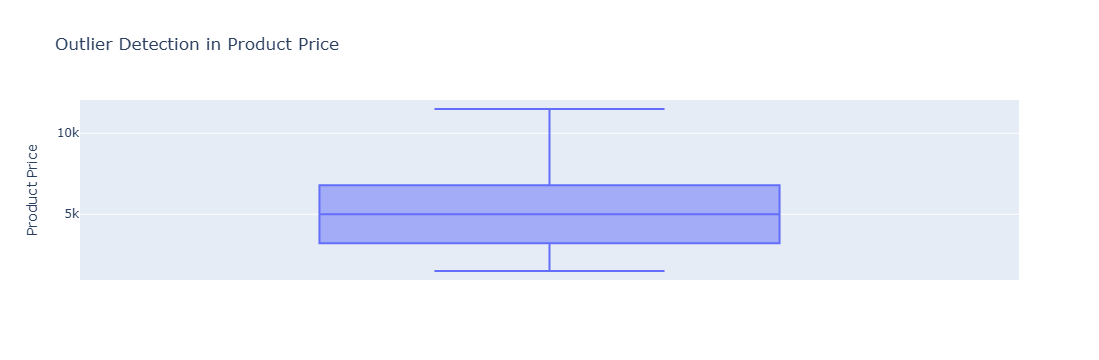

In [415]:
import plotly.express as px

# Creating a box plot to check for outliers in the 'Product Price' column
fig = px.box(df, y='Product Price', title='Outlier Detection in Product Price')
fig.show()


In [413]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Product Price'].quantile(0.25)
Q3 = df['Product Price'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
df[(df['Product Price'] < lower_bound) | (df['Product Price'] > upper_bound)]

# Keep only rows that are not outliers
df = df[(df['Product Price'] >= lower_bound) & (df['Product Price'] <= upper_bound)]

- corr

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the numerical columns
correlation_matrix = ghadah_df[[)'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                'TotalBsmtSF', 'SalePrice']].corr()

# Plot the heatmap using Seaborn with the specified size and layout
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(correlation_matrix, square=True, annot=True, cmap="coolwarm", ax=ax)
plt.title("Correlation Heatmap of Numerical Features with SalePrice")
plt.show()

- Univariate Analysis

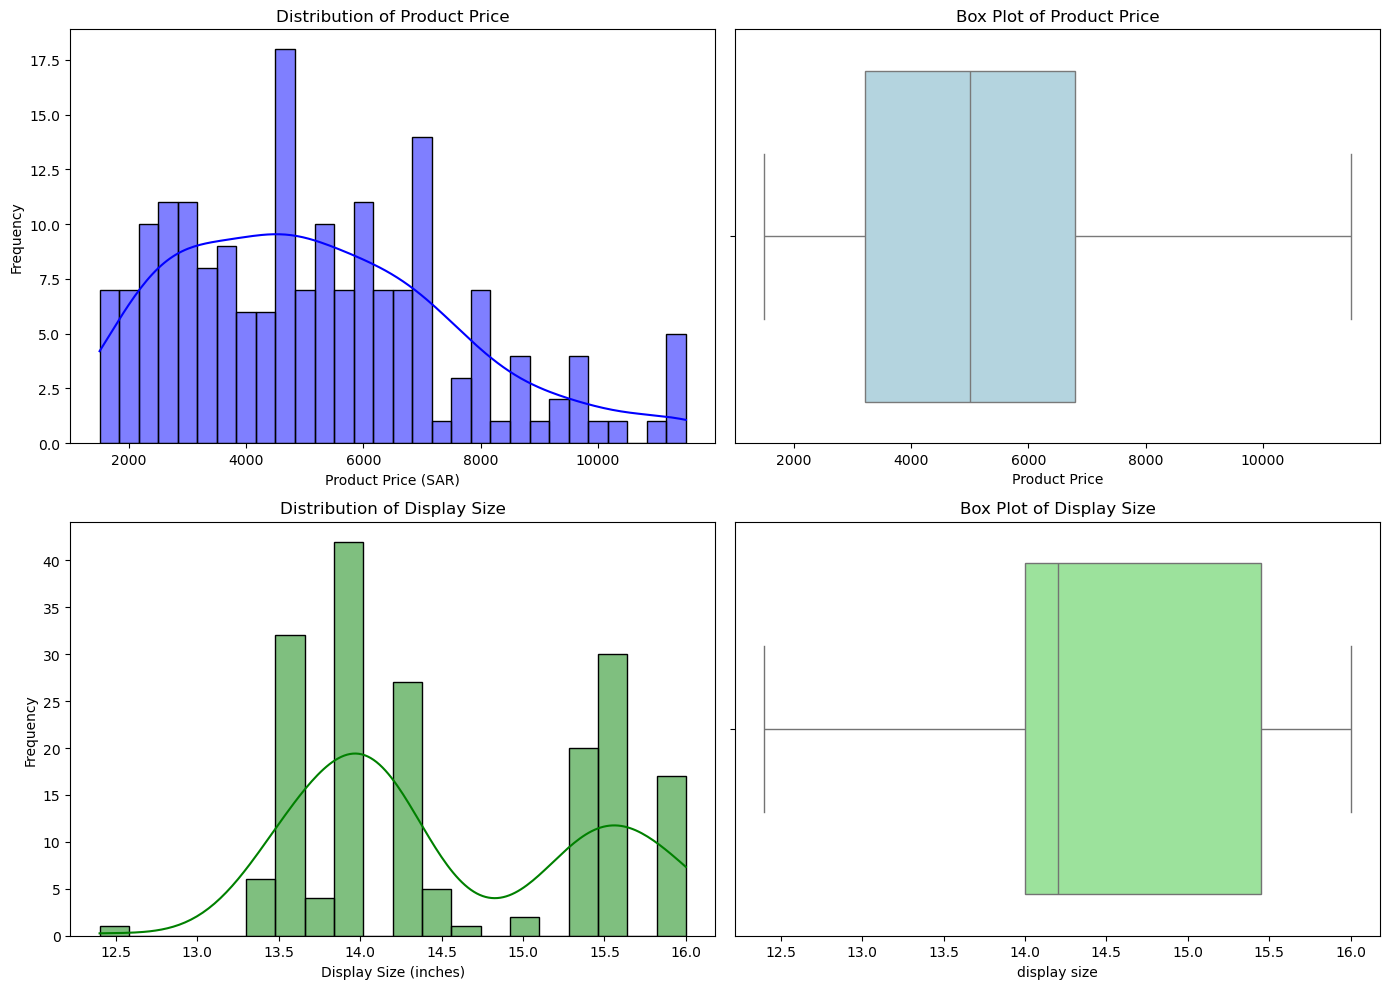

,Product Price,display size
count,187.000000,187.000000
mean,5167.021390,14.529947
std,2369.150031,0.872373
min,1499.000000,12.400000
25%,3214.000000,14.000000
50%,4999.000000,14.200000
75%,6799.000000,15.450000
max,11499.000000,16.000000


In [417]:
# Setting up the figure for visualizations
plt.figure(figsize=(14, 10))

# Univariate Analysis for 'Product Price'
plt.subplot(2, 2, 1)
sns.histplot(df['Product Price'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Product Price')
plt.xlabel('Product Price (SAR)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['Product Price'], color='lightblue')
plt.title('Box Plot of Product Price')

# Univariate Analysis for 'display size'
plt.subplot(2, 2, 3)
sns.histplot(df['display size'].dropna(), kde=True, bins=20, color='green')
plt.title('Distribution of Display Size')
plt.xlabel('Display Size (inches)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['display size'], color='lightgreen')
plt.title('Box Plot of Display Size')

plt.tight_layout()
plt.show()

# Calculating the statistical summary for 'Product Price' and 'display size'
stats_summary = df[['Product Price', 'display size']].describe()
stats_summary


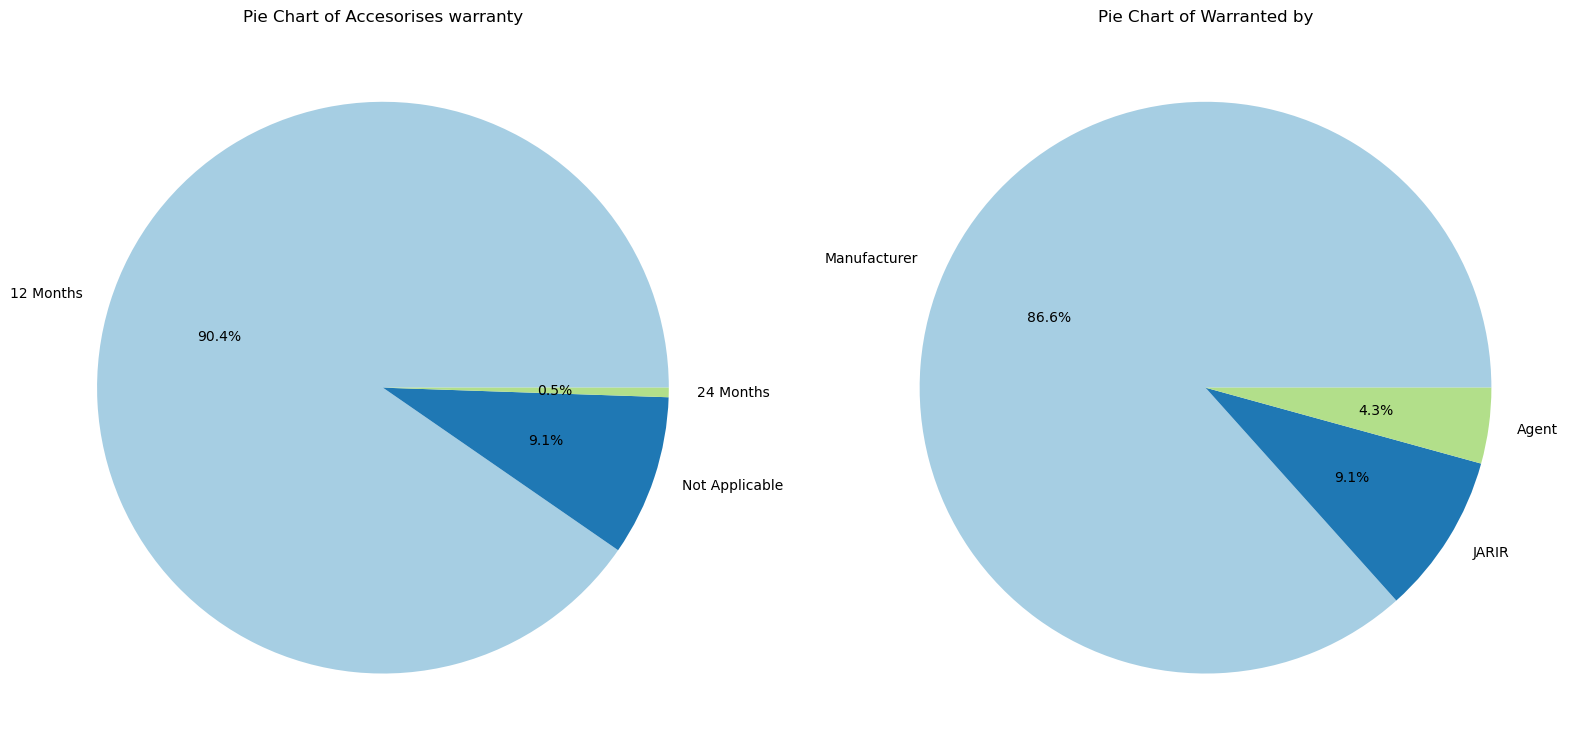

In [423]:
# Creating pie charts for categorical variables with fewer unique categories
plt.figure(figsize=(16, 8))

# Filtering categorical columns with a manageable number of unique categories for pie charts
for i, col in enumerate(['Accesorises warranty', 'Warranted by']):
    plt.subplot(1, 2, i + 1)
    value_counts = df[col].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()


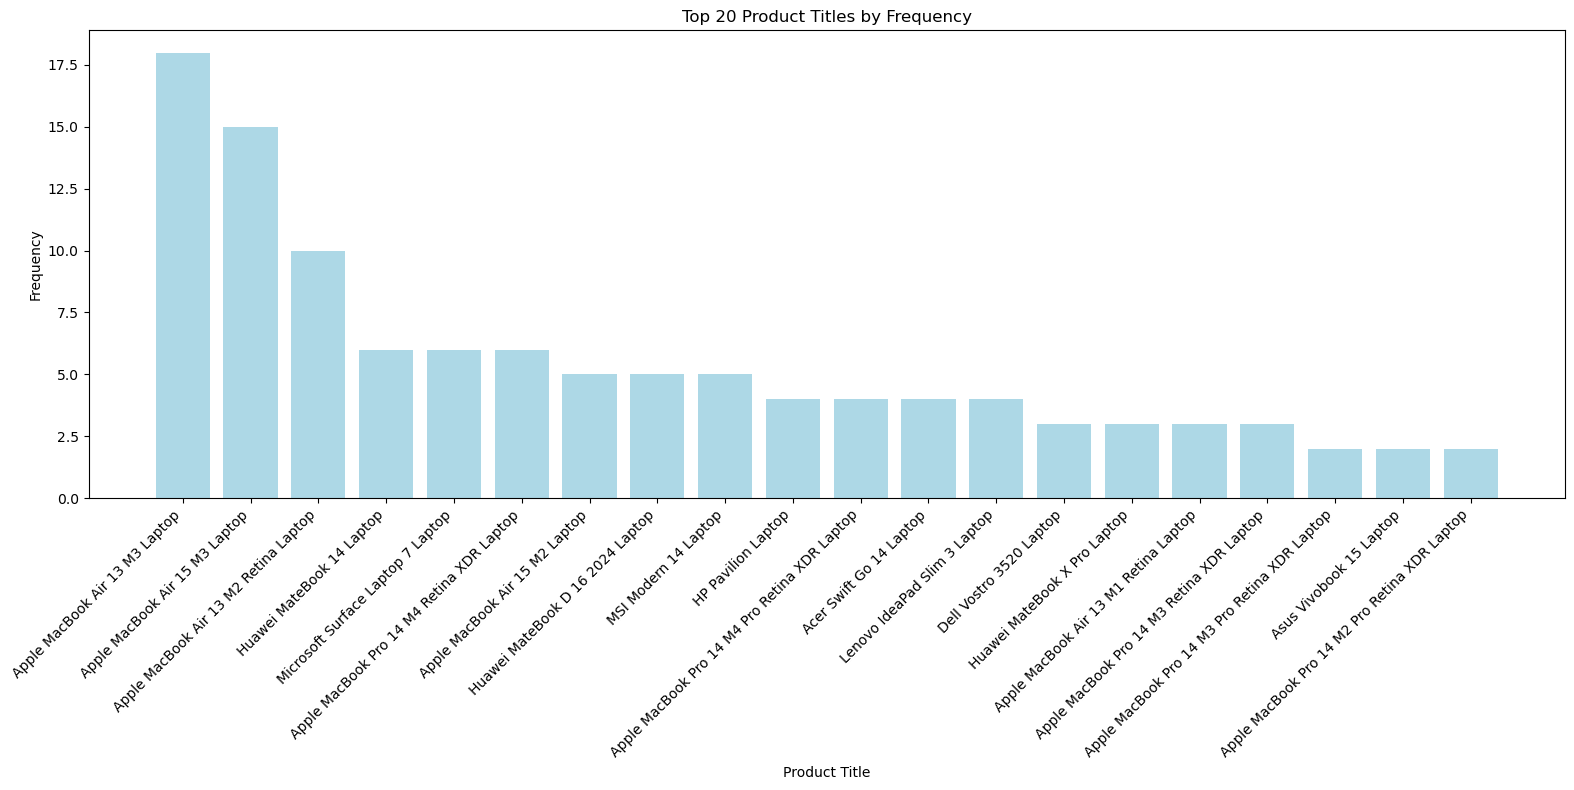

In [425]:
# Creating a bar chart to visualize the frequency distribution of 'Product Title'
plt.figure(figsize=(16, 8))
product_title_counts = df['Product Title'].value_counts().head(20)  # Displaying the top 20 most frequent titles

# Bar chart for Product Title
plt.bar(product_title_counts.index, product_title_counts.values, color='lightblue')
plt.title('Top 20 Product Titles by Frequency')
plt.xlabel('Product Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- Bivariate Analysis with the Target Variable (SalePrice)

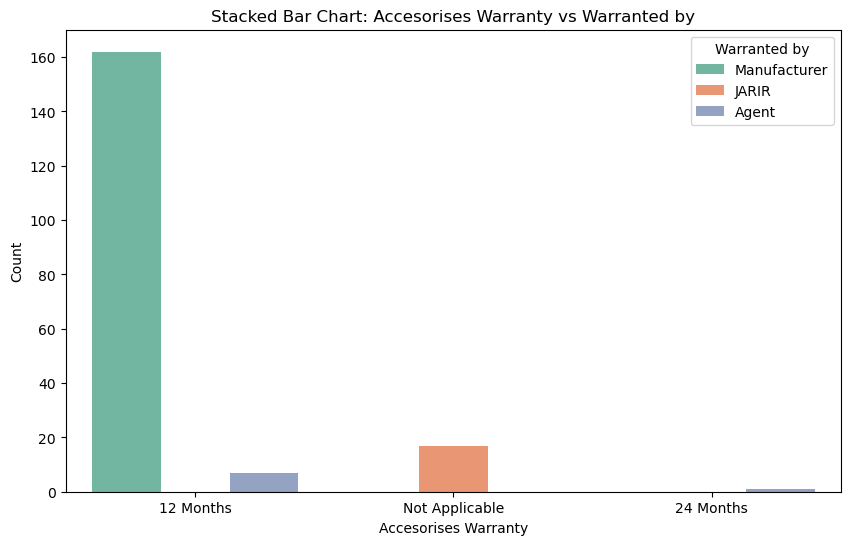

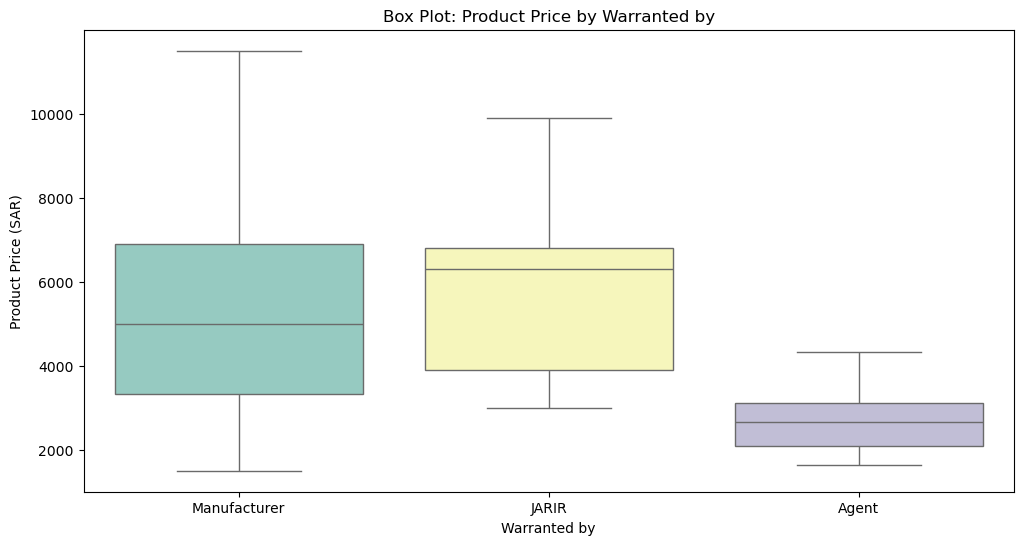

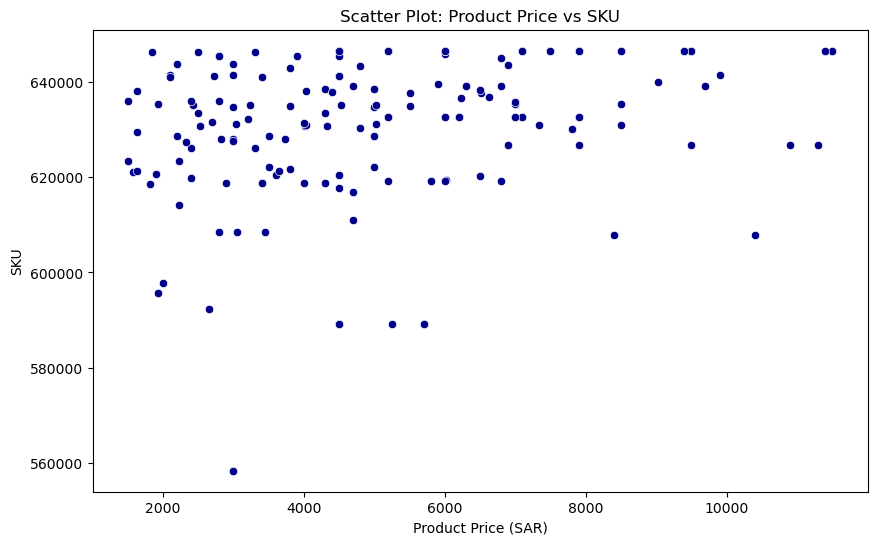

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate Analysis Code Examples

# 1. Categorical & Categorical: Stacked Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Accesorises warranty', hue='Warranted by', palette='Set2')
plt.title('Stacked Bar Chart: Accesorises Warranty vs Warranted by')
plt.xlabel('Accesorises Warranty')
plt.ylabel('Count')
plt.legend(title='Warranted by')
plt.show()

# 2. Categorical & Numerical: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Warranted by', y='Product Price', palette='Set3')
plt.title('Box Plot: Product Price by Warranted by')
plt.xlabel('Warranted by')
plt.ylabel('Product Price (SAR)')
plt.show()

# 3. Numerical & Numerical: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Product Price', y='SKU', color='darkblue')
plt.title('Scatter Plot: Product Price vs SKU')
plt.xlabel('Product Price (SAR)')
plt.ylabel('SKU')
plt.show()


In [432]:
df

,Product Title,Product Price,Warranty Period (Months),Accesorises warranty,Warranted by,SKU,Manufacturer Number,processor type,NPU (Neural Processing Unit),AI (Artificial Intelligence),...,cam resolution,multimedia features,special features,fingerprint,battery type,width,height/length,depth,weight,card reader
0,Huawei MateBook 14 Laptop,4299,24.0,12 Months,Manufacturer,638525.0,53014ASK,Intel Core Ultra 5 125H,Intel AI Boost,Yes,...,FHD (2 MP) Webcam,Built-in Mic/Speakers,Full Size Keyboard,Yes,Lithium Polymer (Li-Po),312.60 mm ( 12.31 in ),226.80 mm ( 8.93 in ),15.90 mm ( .63 in ),1.31 kg ( 2.89 lb ),No
1,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,646475.0,MC9D4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,1080p FaceTime HD Camera,Built-in Mic/Speakers,Not Applicable,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),No
2,Apple MacBook Air 15 M3 Laptop,5999,24.0,12 Months,Manufacturer,632673.0,MRYR3ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,1080p FaceTime HD Camera,Built-in Mic/Speakers,Not Applicable,Yes,Lithium Polymer (Li-Po),34.04 cm ( 13.40 in ),23.76 cm ( 9.35 in ),1.15 cm ( .45 in ),1.51 kg ( 3.33 lb ),No
3,Asus Laptop,3799,24.0,12 Months,Manufacturer,642879.0,UM3406OLEDR7W,AMD Ryzen 7-8840HS,AMD XDNA up to 16 TOPS,Yes,...,1080P FHD Camera,Harman Kardon,Backlit Chiclet Keyboard,Yes,Lithium Ion (Li-Ion) - 4 Cell,32.24 cm ( 12.69 in ),22.01 cm ( 8.67 in ),1.49 cm ( .59 in ),1.20 kg ( 2.65 lb ),Yes
4,Microsoft Surface Laptop 7 Laptop,9699,24.0,Not Applicable,JARIR,639206.0,ZHI00014,Snapdragon X Elite 12 Core,Qualcomm Hexagon NPU 45 TOPS,Yes,...,1080P FHD Camera,Not Applicable,CoPilot+,No,Lithium Ion (Li-Ion) - 6 Cell,32.90 cm ( 12.95 in ),23.90 cm ( 9.41 in ),1.80 cm ( .71 in ),1.60 kg ( 3.53 lb ),No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Apple MacBook Air 13 M3 Laptop,5199,24.0,12 Months,Manufacturer,646468.0,MC8J4ABA,M3 8-core CPU,16-core Neural Engine,Yes,...,1080p FaceTime HD Camera,Built-in Mic/Speakers,Not Applicable,Yes,Lithium Polymer (Li-Po),30.41 cm ( 11.97 in ),21.50 cm ( 8.46 in ),1.10 cm ( .43 in ),1.24 kg ( 2.73 lb ),No
201,Lenovo IdeaPad Pro 5 Laptop,5029,24.0,12 Months,Manufacturer,631066.0,83D4004NAD,Intel Core Ultra 7 155H,Not Applicable,No,...,FHD 1080p + IR with Privacy Shutter,"Dolby Atmos Sound System, (2 X 2W) Speakers","High Definition Audio, Realtek ALC3287 Codec, ...",No,Lithium Polymer (Li-Po),35.60 cm ( 14.02 in ),25.10 cm ( 9.88 in ),1.75 cm ( .69 in ),1.94 kg ( 4.28 lb ),Yes
202,Huawei MateBook D 14 Laptop,2799,24.0,12 Months,Manufacturer,608551.0,NBDEWDH9,Intel Core i5-1155G7 (11th Gen),Not Applicable,No,...,720P HD Recessed Camera,2 X 2W Speakers,"Low Blue Light, Flicker Free",Yes,Lithium Polymer (Li-Po) - 4 Cell,32.25 cm ( 12.70 in ),21.48 cm ( 8.46 in ),1.59 cm ( .63 in ),1.38 kg ( 3.04 lb ),No
203,Dell Vostro 3520 Laptop,2499,24.0,12 Months,Manufacturer,646301.0,VOSTROI5,Intel Core i5-1235U (12th Gen),Not Applicable,No,...,720p HD Camera,Built-in Dual Stereo Speakers,Not Applicable,Yes,Lithium Ion (Li-Ion) - 3 Cell,35.85 cm ( 14.11 in ),23.56 cm ( 9.28 in ),2.25 cm ( .89 in ),1.66 kg ( 3.66 lb ),Yes
